Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

# Week7 Assignment - Regression.

For this assignment, you will use the Ames housing dataset. The basic goal of this assignment is to predict housing prices for houses in Ames, Iowa.

In the first component, you will load the training dataset and convert it into a Pandas dataframe.

In the second component, you will plot the data. This component is ungraded.

In the third component, you will preprocess the data.

In the fourth component, you will split your data for training and testing.

In the fifth component, you will build and evaluate your model on the test data.

All the exercises are designed so that the solutions will need only one or a few lines of code.

Do not hesitate to contact instuctors and TA via #week7 channel on Slack if you get stuck. Join the channel first by clicking on Channels.

## Part A. Read in the Ames dataset. 

In this component you will read the Ames housing dataset into a Pandas data frame. This dataset contains samples of Ames houses, with multiple features. The value we want to predict is the cost of given house.

Make sure you download the ames_train.csv file from the course website. Do not manually modify the ames datasets.

Save to a data frame named ames_data.

In [25]:
import pandas as pd
import numpy as np

ames_data = pd.read_table("ames_train.csv", sep = ",")

print(ames_data.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008     

In [26]:
assert isinstance(ames_data, pd.core.frame.DataFrame)
assert ames_data.shape == (1460, 81)
assert ames_data["1stFlrSF"].sum() == 1697435
assert ames_data["2ndFlrSF"].sum() == 506609
assert ames_data.isnull().sum().sum() == 6965

## Part B. Plot the data.
Now that we've loaded the data, let's take a look at some features.

Perhaps naively, you think that the best predictors for house prices are the square footage values ("1stFlrSF", "2ndFlrSF").

Go ahead and plot a histogram of each, to get an idea of their distributions. See if you see anything interesting.

Following this, maybe try to get feel of the relationship between each of these and our target ("SalePrice", the house prices). Plot a scatter plot with SalePrice on the Y axis and 1stFlrSF on the X axis. Does it look like it may be a good predictor? What about 2ndFlrSF?

What about the sum of the two? Plot a scatter plot with SalePrice on the Y axis and the sum of 1stFlrSF and 2ndFlrSF on the X axis.

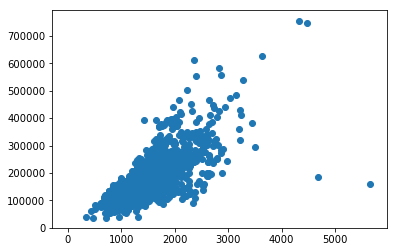

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(ames_data["1stFlrSF"])
plt.hist(ames_data["2ndFlrSF"])
#plt.scatter(ames_data["1stFlrSF"],ames_data["SalePrice"])
#plt.scatter(ames_data["2ndFlrSF"],ames_data["SalePrice"])
plt.scatter(ames_data["1stFlrSF"] + ames_data["2ndFlrSF"], ames_data["SalePrice"])



## Part C. Preprocess the data.

It looks like the sum of 1stFlrSF and 2ndFlrSF may be good predictors.

Create a new column, named sqft_sum, that contains the summation of these two.

Look at the scatter plot of sqft_sum on the X axis and SalePrice on the Y axis. Note that it appears that there are two outliers: houses that are large but sold for very cheap. It may be a good choice to remove these, as it appears that they may have sold for much less than they are worth.

**Important note**: Whether or not to drop outliers is a debatable topic. Namely, it depends what you are trying to do and what the outliers represent. Wrongly treating outliers can bias your data. If you know the outliers are in error, or you know that they are not important to your goals, you can drop them. However, sometimes you will want to examine why they are outliers, what they are telling you. In our example, you may want to figure out WHY these houses sold for less than they are worth. E.g. Are they in a particularly loud neighborhood? Once we know that we can decide whether or not to include them. As stated in class, preprocessing is a very subjective phase. For the homework assignment, however, we will drop both of these outliers.

To summarize, in the next cell you need to:
1. Create a new column, sqft_sum, that is equal to the sum of the columns 1stFlrSF and 2ndFlrSF.
2. Remove the two clear outliers. If you plot the data (sqft_sum on X axis, SalePrice on Y axis), you should see them clearly in the plot. They are the two houses that appear to have been sold for much less than other houses in the same size range.

[523, 1298]
[1460, 82]
[1458, 82]


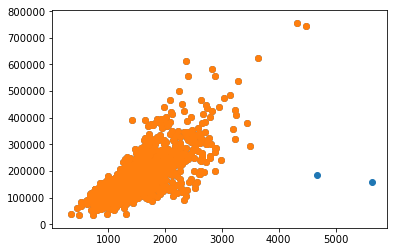

In [28]:
ames_data['sqft_sum'] = ames_data["1stFlrSF"] + ames_data["2ndFlrSF"]
plt.scatter(ames_data["sqft_sum"], ames_data["SalePrice"])
outlier = ames_data.index[ames_data["sqft_sum"] > 4500].tolist()
print(outlier)
print(list(ames_data.shape)) # shape before outliers are dropped
ames_data.drop([523,1298], axis = 0, inplace = True)
plt.scatter(ames_data["sqft_sum"], ames_data["SalePrice"])
print(list(ames_data.shape))

In [29]:
assert ames_data.shape == (1458, 82)
assert "sqft_sum" in ames_data.columns
assert ames_data["sqft_sum"].sum() == 2193726

## Part D. Split our data for evaluation.

We've loaded our data, plotted it to see what it looks like, and preprocessed it.

It's time to train and evaluate our model. At this stage, we will be evaluating based on a test set we create by splitting the data in two.

The features you will be using are: sqft_sum and Fireplaces (the number of fireplaces in the house).

Below, you will set X to equal the ames_data with only the two columns we are interested in (sqft_sum and Fireplaces), and y to equal the ames_data SalePrice column (what we are trying to predict). Then, you will run the code below to split the data into training and test.

In [30]:
from sklearn.model_selection import train_test_split

X = ames_data[["sqft_sum", "Fireplaces"]]
y = ames_data['SalePrice']
# Now we will split your data into training and test, for evaluation
# Note the function below
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=12323)
# train_test_split(): Split arrays or matrices into random train and test subsets

In [31]:
assert X_train.shape == (1093, 2)
assert X_test.shape == (365, 2)
assert y_train.sum() == 196281710

## Part E. Build and evaluate a linear regression model.
Build a linear regression model based on the X_train data. Name the model *lr*.

Once the model is built, predict the SalePrice for the test set X_test. Name the predictions *y_preds*.

Calculate the RMSE between y_preds and y_test. Name the RMSE *rmse*.


Hints:
* Use sklearn's LinearRegression function to fit a model.
* Use sklearn's mean_squared_error to evaluate the model.

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lr.fit(X_train, y_train) # train my model
y_preds = lr.predict(X_test) # predict y values based off of x values

rmse = np.sqrt(mean_squared_error(y_preds, y_test))
# The RMSD (or RMSE) represents the sample standard deviation of the differences between 
# predicted values and observed values.

lr.score(X_train, y_train) # r^2 value (coefficient of determination)
lr.score(X_test,y_test)
lr.coef_

# Documentation:
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

array([   107.30899533,  17702.9626724 ])

In [54]:
assert isinstance(lr, LinearRegression)
assert np.isclose(y_preds.sum(), 67114985.983310223)
assert np.isclose(rmse, 53444.9760401)